In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv("survey_results_public.csv")

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [5]:
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp"]]
df = df.rename({'ConvertedComp':'Salary'},axis=1)

In [6]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [7]:
df = df[df['Salary'].notna()]

In [8]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [10]:
df.isna().sum()

Country           0
EdLevel         568
YearsCodePro    135
Employment       39
Salary            0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [13]:
df['Employment'].value_counts()

Employed full-time                                      30019
Independent contractor, freelancer, or self-employed     2998
Employed part-time                                       1008
Name: Employment, dtype: int64

In [14]:
df = df[df['Employment'] == 'Employed full-time']

In [15]:
df = df.drop("Employment",axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [17]:
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [18]:
def shorten_categories(categories,cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map

In [19]:
country_map = shorten_categories(df['Country'].value_counts(),400)

In [20]:
df['Country'] = df['Country'].map(country_map)

In [21]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


In [22]:
df['Country'].value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

Text(0.5, 1.0, '')

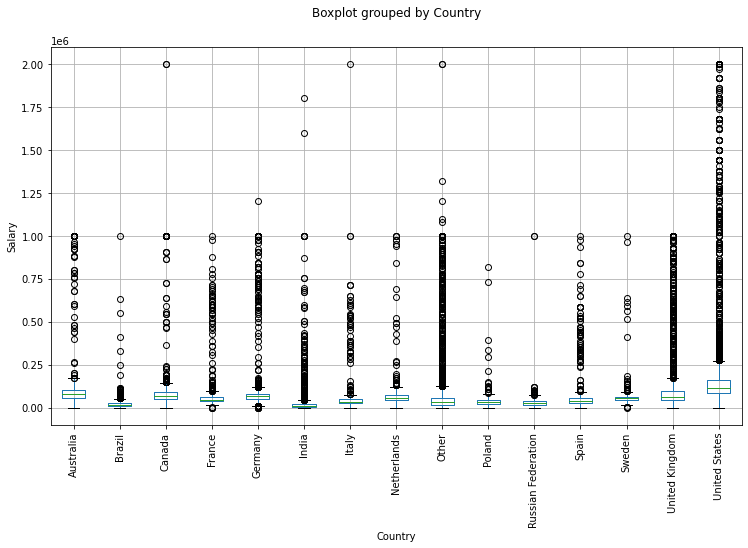

In [23]:
fig , ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.title("")

In [24]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] > 10000]
df = df[df['Country']!='Other']

Text(0.5, 1.0, '')

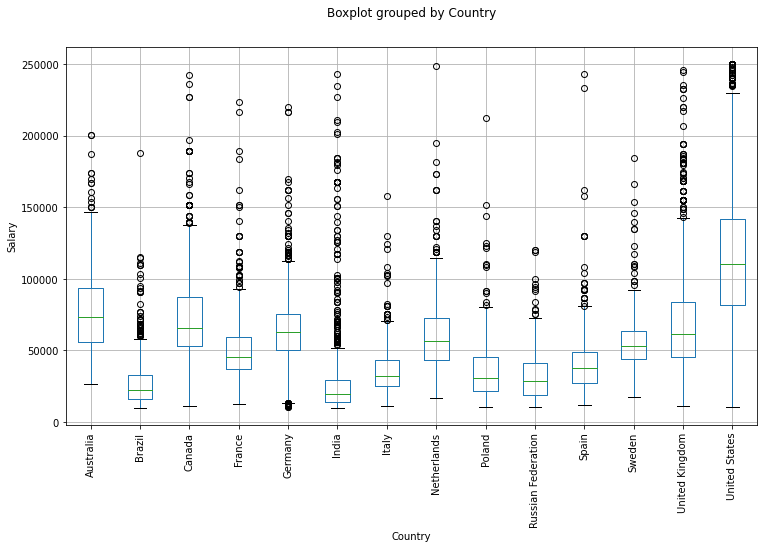

In [25]:
fig , ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.title("")

In [26]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [27]:
df['YearsCodePro'].replace({'Less than 1 year' : 0 , 'More than 50 years' : 50})

7        13
9         4
10        2
11        7
12       20
         ..
64113    15
64116     6
64122     4
64127    12
64129     4
Name: YearsCodePro, Length: 18489, dtype: object

In [28]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [29]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    else:
        return float(x)

In [30]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [31]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [32]:
df['EdLevel'].replace({'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':"Bachelor's degree (B.A., B.S., B.Eng., etc.)" ,
                      'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':"Master's degree (M.A., M.S., M.Eng., MBA, etc.)"})

7             Bachelor's degree (B.A., B.S., B.Eng., etc.)
9          Master's degree (M.A., M.S., M.Eng., MBA, etc.)
10            Bachelor's degree (B.A., B.S., B.Eng., etc.)
11       Some college/university study without earning ...
12       Secondary school (e.g. American high school, G...
                               ...                        
64113    Some college/university study without earning ...
64116         Bachelor's degree (B.A., B.S., B.Eng., etc.)
64122                  Associate degree (A.A., A.S., etc.)
64127           Other doctoral degree (Ph.D., Ed.D., etc.)
64129      Master's degree (M.A., M.S., M.Eng., MBA, etc.)
Name: EdLevel, Length: 18489, dtype: object

In [33]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    elif "Master’s degree" in x:
        return "Master's degree"
    elif "Professional degree" in x or "Other doctoral degree" in x:
        return "Post Grad"
    else:
        return "Less than Bachelor's"

In [34]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [35]:
df['EdLevel'].unique()

array(["Bachelor's degree", "Master's degree", "Less than Bachelor's",
       'Post Grad'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

In [38]:
X = df.drop('Salary',axis=1)
y = df['Salary']

In [39]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
7,13,0,13.0,116000.0
9,12,2,4.0,32315.0
10,12,0,2.0,40070.0
11,10,1,7.0,14268.0
12,7,1,20.0,38916.0


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()
reg.fit(X,y.values)
y_pred = reg.predict(X)

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
np.sqrt(mean_squared_error(y_pred,y))

39271.32095686892

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dt = DecisionTreeRegressor(random_state = 1)
dt.fit(X,y.values)
y_pred = dt.predict(X)

In [46]:
np.sqrt(mean_squared_error(y,y_pred))

29407.04380620288

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X,y.values)
y_pred = rf.predict(X)

In [49]:
np.sqrt(mean_squared_error(y,y_pred))

29486.165860525412

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
max_depth = [None , 2, 4, 6, 8, 10, 12]
parameters = {'max_depth' : max_depth}

regressor = DecisionTreeRegressor(random_state=1)

gs = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error')
gs.fit(X,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [52]:
regressor = gs.best_estimator_
y_pred = regressor.predict(X)

In [53]:
np.sqrt(mean_squared_error(y,y_pred))

30420.9865931035

In [54]:
X = np.array([["India","Bachelor's degree",3]])

In [55]:
X[:,0] = le_country.transform(X[:,0])
X[:,1] = le_education.transform(X[:,1])
X = X.astype(float)

In [56]:
y_pred = regressor.predict(X)
y_pred

array([26550.62177986])

In [57]:
import pickle

In [58]:
data = {'model': regressor,'le_country':le_country,'le_education':le_education}
with open('saved_model.pkl','wb') as file:
    pickle.dump(data,file)

In [59]:
with open('saved_model.pkl','rb') as file:
    data = pickle.load(file)

In [60]:
loaded_model = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [61]:
y_pred = loaded_model.predict(X)

In [62]:
y_pred

array([26550.62177986])

In [64]:
df['Country'].value_counts().values

array([6829, 2005, 1799, 1199, 1104,  922,  761,  630,  614,  597,  542,
        513,  502,  472], dtype=int64)